## Visualizing Time Series Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Basic Time Series Data Visualization Techniques

**Line Plot**

In [2]:
# Load example dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


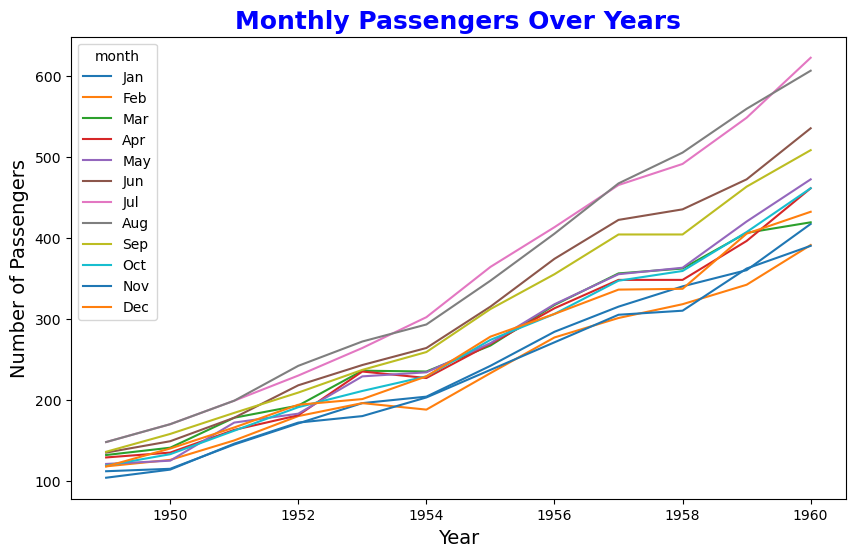

In [3]:
plt.figure(figsize=(10,6))
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='tab10')
plt.title("Monthly Passengers Over Years", fontsize=18, fontweight='bold', color='blue')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Passengers", fontsize=14)
plt.show()

**Bar Chart**

In [5]:
# Load example dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


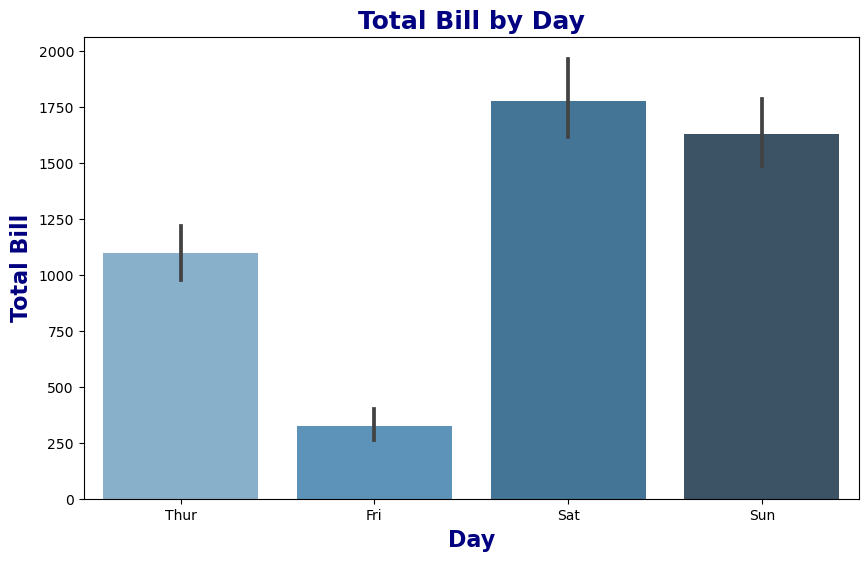

In [6]:
# Plotting a bar chart of total bill across different days
plt.figure(figsize=(10,6))
sns.barplot(data=tips, x='day', y='total_bill', estimator=sum, palette='Blues_d')
plt.title("Total Bill by Day", fontweight='bold', fontsize=18, color='navy')
plt.xlabel("Day", fontweight='bold', fontsize=16, color='navy')
plt.ylabel("Total Bill", fontweight='bold', fontsize=16, color='navy')
plt.show()

**Bar chart for Total Passenger Per Year**

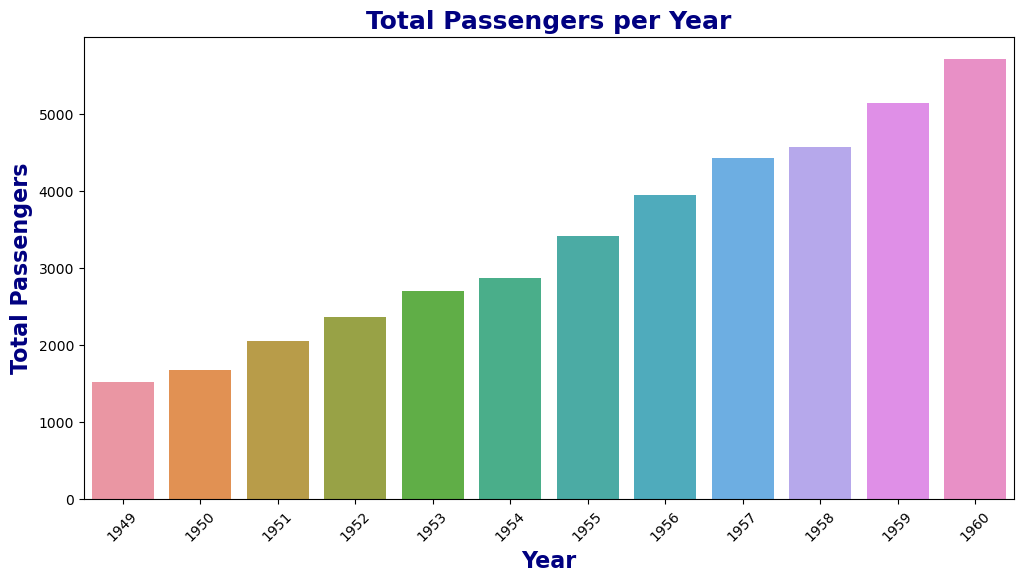

In [7]:
yearly_passengers = flights.groupby("year")["passengers"].sum().reset_index()  # aggregates total number of passengers for each year in the flights
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_passengers, x="year", y="passengers")
plt.title("Total Passengers per Year", fontweight='bold', fontsize=18, color='navy')
plt.xlabel("Year", fontweight='bold', fontsize=16, color='navy')
plt.ylabel("Total Passengers", fontweight='bold', fontsize=16, color='navy')
plt.xticks(rotation=45)
plt.show()

**Area Chart**

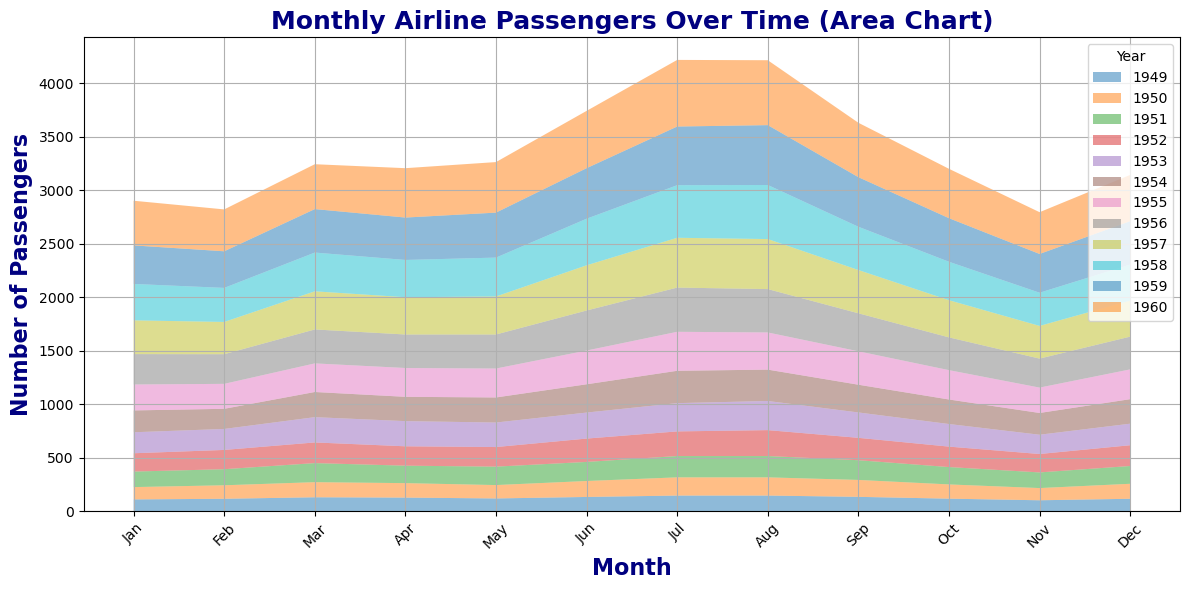

In [8]:
# Pivot the dataset to get a matrix of passengers per month and year
flights_pivot = flights.pivot_table(index='month', columns='year', values='passengers', fill_value=0)

plt.figure(figsize=(12, 6))
plt.stackplot(flights_pivot.index, flights_pivot.T, labels=flights_pivot.columns, alpha=0.5)
plt.title('Monthly Airline Passengers Over Time (Area Chart)', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Number of Passengers', fontsize=16, fontweight='bold', color='navy')
plt.xticks(range(0, 12), flights['month'].unique(), rotation=45)
plt.legend(title='Year')
plt.grid()
plt.tight_layout()
plt.show()


**Stacked Area Chart**

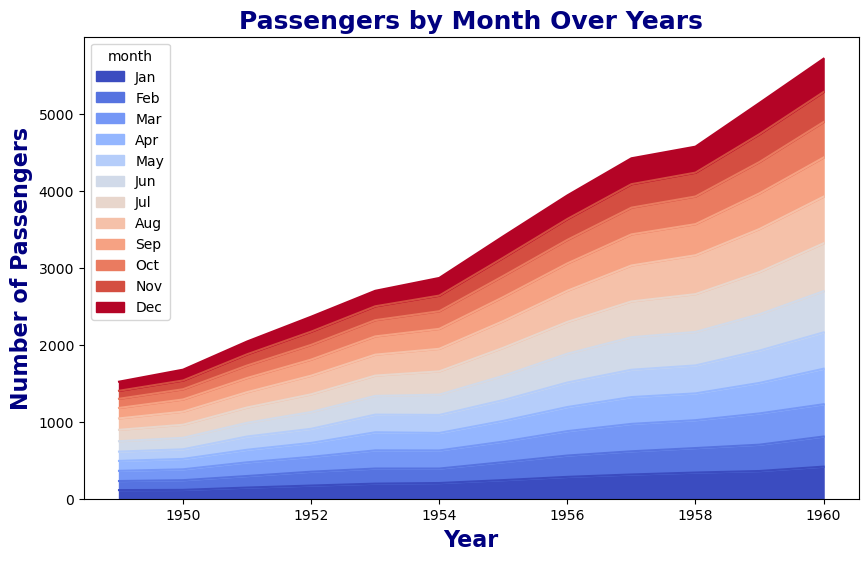

In [9]:
# Pivot the data to get a year-wise comparison of passengers for each month
flights_pivot = flights.pivot(index='year', columns='month', values='passengers')

# Plotting an area chart (stacked) for passengers
flights_pivot.plot(kind='area', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Passengers by Month Over Years", fontweight='bold', fontsize=18, color='navy')
plt.ylabel("Number of Passengers", fontweight='bold', fontsize=16, color='navy')
plt.xlabel("Year", fontweight='bold', fontsize=16, color='navy')
plt.show()

---